<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Utility-Functions-for-Plotting" data-toc-modified-id="Utility-Functions-for-Plotting-1.1">Utility Functions for Plotting</a></span></li></ul></li><li><span><a href="#Training-and-Testing" data-toc-modified-id="Training-and-Testing-2">Training and Testing</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-2.1"><a href="https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation" target="_blank">Cross-validation</a></a></span><ul class="toc-item"><li><span><a href="#sklearn.model_selection.cross_val_score" data-toc-modified-id="sklearn.model_selection.cross_val_score-2.1.1"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html" target="_blank">sklearn.model_selection.cross_val_score</a></a></span></li><li><span><a href="#sklearn.model_selection.cross_val_predict:" data-toc-modified-id="sklearn.model_selection.cross_val_predict:-2.1.2"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_prediction" target="_blank">sklearn.model_selection.cross_val_predict</a>:</a></span></li></ul></li></ul></li><li><span><a href="#Overfitting,-Underfitting" data-toc-modified-id="Overfitting,-Underfitting-3">Overfitting, Underfitting</a></span><ul class="toc-item"><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-3.1">Overfitting</a></span></li></ul></li><li><span><a href="#Model-Seletion" data-toc-modified-id="Model-Seletion-4">Model Seletion</a></span><ul class="toc-item"><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-4.1"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">Ridge regression</a></a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.2"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">Grid Search</a></a></span></li></ul></li></ul></div>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [160]:
from IPython.display import display
from IPython.html import widgets 
from ipywidgets import interact, interactive, fixed, interact_manual

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

In [162]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [163]:
# %%capture
# ! pip install ipywidgets

<h1 style="color:maroon" align=center><font size=6>Data Analysis with Python</font></h1>

<h1 style="color:maroon" align=center>Model Evaluation and Refinement</h1>

**Objectives:** We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are. 

## Data Preparation

This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/cognitive_class_DA0101EN_objectstorage">HERE</a> for free storage.

In [164]:
# !wget -P ./Data/ 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'

In [165]:
# Import clean data 
PATH='./Data/'

In [166]:
df = pd.read_csv(PATH+'module_5_auto.csv')

 First lets only use numeric data 

In [167]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [168]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


### Utility Functions for Plotting

In [215]:
def dist_plot(ground_truth, predictions, label_truth, label_pred, Title):

    plt.figure(figsize=(12, 10))

    ax1 = sns.distplot(ground_truth, hist=False, color="r", label=label_truth)
    ax2 = sns.distplot(predictions, hist=False, color="b", label=label_pred, ax=ax1)
    
    plt.title(Title, fontsize=18, c='r')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

In [194]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    """
    xtrain, y_train: training data 
    xtest, y_test: testing data 
    lr:  linear regression object 
    poly_transform:  polynomial transformation object 
    """

    plt.figure(figsize=(12, 10))
    x_max = max([xtrain.values.max(), xtest.values.max()])
    x_min = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(x_min, x_max, 0.1)
    x_transformed = poly_transform.fit_transform(x.reshape(-1, 1))

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(x_transformed), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Training and Testing

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [171]:
y_data = df['price']

drop price data in x data

In [172]:
x_data = df.drop('price',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])


number of test samples : 31
number of training samples: 170


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 

In [174]:
# Write your code below and press Shift+Enter to execute 
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

 We create a Linear Regression object:

In [175]:
lre = LinearRegression()

we fit the model using the feature horsepower 

In [176]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's Calculate the $R^2$ on the test data:

In [177]:
lre.score(x_test[['horsepower']], y_test) # R-squred score

0.707688374146705

we can see the $R^2$ is much smaller using the test data.

In [178]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

### [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using $k-1$ of the folds as training data;

- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

#### [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

We input the object, the feature in this case `horsepower`, the target data (y_data). The parameter `cv`  determines the number of folds; in this case 4. 

In [180]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is the estimator’s default scorer (**R2** for L.Reg.); each element in the array has the average  **R2** value in the fold:

In [181]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:

In [182]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  `scoring` metric to `neg_mean_squared_error`. 

In [183]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

#### [sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_prediction):

You can also use the function `cross_val_predict` to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

In [184]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case __horsepower__ , the target data __y_data__. The parameter `cv` determines the number of folds; in this case 4. We can produce an output:

In [185]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
print(yhat.size)
yhat[0:5]

201


array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting

It turns out that the __test data__ sometimes referred to as the __out of sample data__ is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [186]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size']], y_train)

LinearRegression()

Prediction using training data:

In [187]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size']])
yhat_train[0:5]

array([11976.99287697, 11293.58273594,  6454.34017887, 21870.38359432,
       16583.96167997])

Prediction using test data: 

In [188]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size']])
yhat_test[0:5]

array([11330.48362517,  5901.01313534, 11281.58967699,  6704.74308281,
       15564.5354029 ])

Let's perform some model evaluation using our training and testing data separately.

Let's examine the distribution of the predicted values of the training data.

/Users/a.momin/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a.momin/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


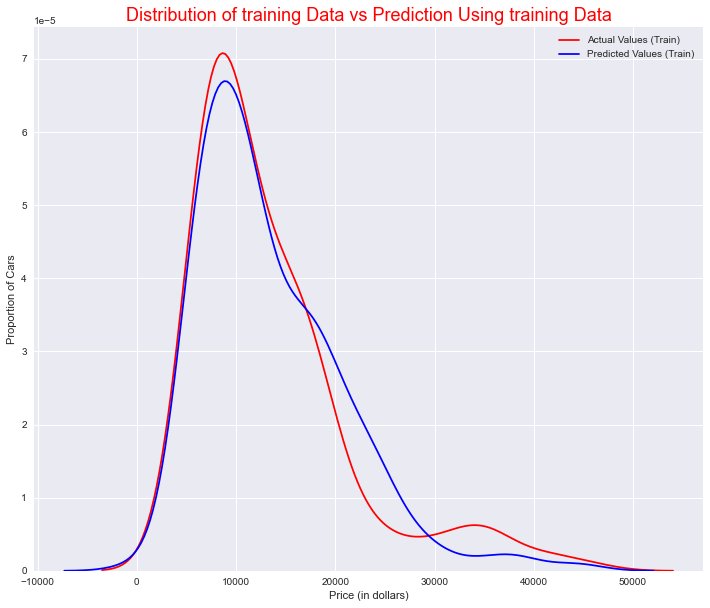

In [216]:
Title='Distribution of training Data vs Prediction Using training Data'
dist_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

In [210]:
data = pd.DataFrame(np.array([y_train, yhat_train]).T, columns=['y_train', 'yhat_train']); data

,y_train,yhat_train
0,8921.0,11976.992877
1,12945.0,11293.582736
2,6849.0,6454.340179
3,15998.0,21870.383594
4,18150.0,16583.961680
...,...,...
165,18620.0,16738.265637
166,7126.0,8896.982309
167,16503.0,19417.710926
168,9233.0,9846.545118


In [219]:
# plt.figure(figsize=(12, 10))
# sns.kdeplot(data=data)

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

/Users/a.momin/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a.momin/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


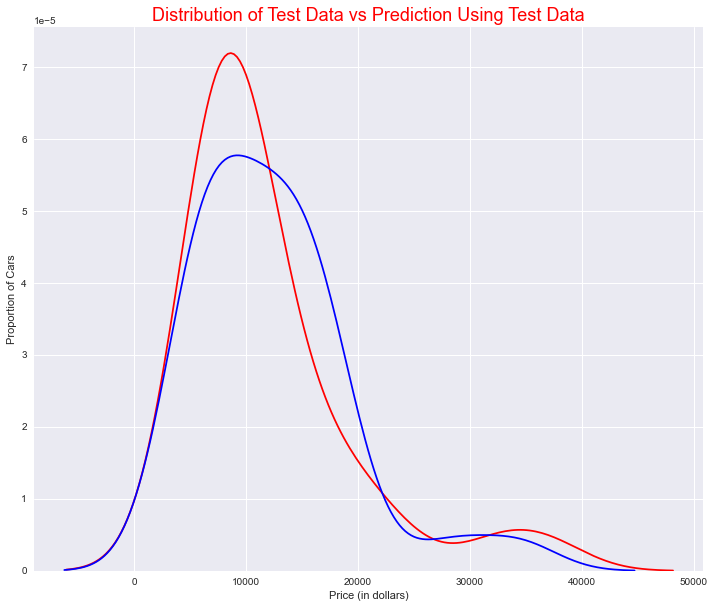

In [212]:
Title='Distribution of Test Data vs Prediction Using Test Data'
dist_plot(y_test, yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

### Overfitting

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for testing and the rest for training:

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [99]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now let's create a linear regression model "poly" and train it.

In [100]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method  "predict." then assign the values to "yhat".

In [101]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

Let's take the first five predicted values and compare it to the actual targets. 

In [102]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

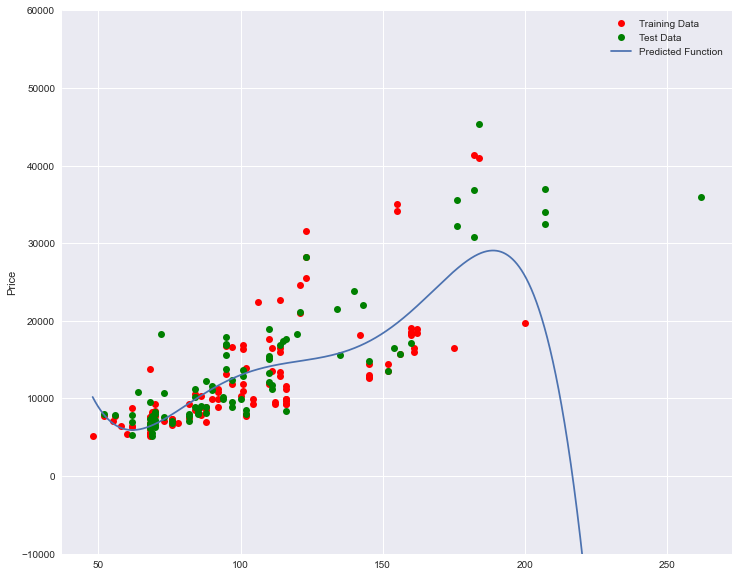

In [103]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 **$R^2$ of the training data:**

In [104]:
poly.score(x_train_pr, y_train)

0.5567716899817778

 **$R^2$ of the test data:**

In [105]:
poly.score(x_test_pr, y_test)

-29.871838229908324

We see the **$R^2$** for the training data is 0.5567 while the **$R^2$** on the test data was -29.87.  The lower the **$R^2$**, the worse the model, a Negative **$R^2$** is a sign of overfitting.

Let's see how the $R^2$ changes on the test data for different order polynomials and plot the results:

Text(3, 0.74, 'Maximum $R^2$ ')

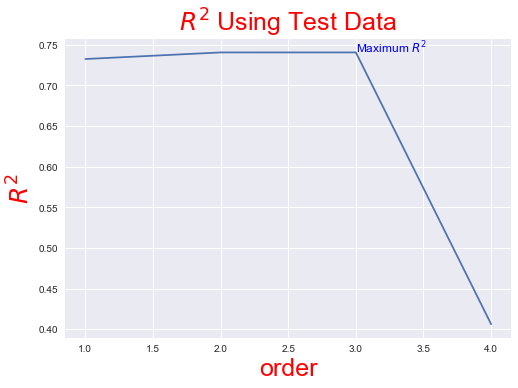

In [106]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order', fontsize=25, c='red')
plt.ylabel('$R^2$', fontsize=25, c='red')
plt.title('$R^2$ Using Test Data', fontsize=25, c='red')
plt.text(3, 0.74, 'Maximum $R^2$ ', fontsize=12, c='blue')    

We see the **$R^2$** gradually increases until an order three polynomial is used. Then the  **$R^2$** dramatically decreases at four.

The following function will be used in the next section; please run the cell.

In [107]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)

    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 

In [108]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

## Model Seletion

### [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

 In this section, we will review Ridge Regression, we will see how the parameter, $\alpha$ changes the model. Just a note here our test data will be used as validation data.

 Let's perform a degree two polynomial transformation on our data. 

In [109]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_train_pr.shape

(110, 28)

Let's create a Ridge regression object, setting the regularization parameter to 0.1 

In [110]:
RigeModel = Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.

In [111]:
RigeModel.fit(x_train_pr, y_train)
RigeModel.coef_

/Users/a.momin/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


array([ 0.00000000e+00, -8.54266360e+02,  4.06385313e+01, -4.21660762e+02,
       -4.55619223e+02,  5.01400258e+02, -1.09435797e+03,  1.00608002e+00,
        1.30325949e-01, -7.28514727e-01,  1.35367295e+01, -3.55446472e-02,
       -1.25895506e+01, -7.59625096e-03,  1.95963486e-01, -3.28775275e-01,
       -1.54878998e-01,  2.60442103e+00, -5.48374423e-01,  1.22604720e+00,
        8.14717126e-01, -1.85687025e+01,  1.02648297e+01, -6.48508833e+00,
        1.00548521e+01,  7.27355257e-02, -2.07119497e+01,  2.25951410e+02])

 Similarly, you can obtain a prediction: 

In [112]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set 

In [113]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 

In [114]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
alphas = 10 * np.array(range(0,1000))
for alpha in alphas:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of $R^2$ for different Alphas 

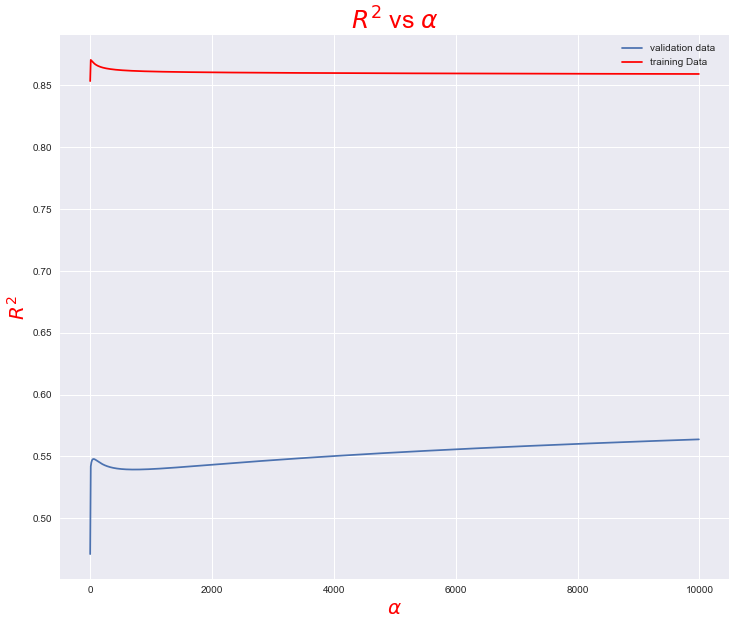

In [115]:
plt.figure(figsize=(12, 10))

plt.plot(alphas, Rsqu_test, label='validation data  ')
plt.plot(alphas, Rsqu_train, 'r', label='training Data ')
plt.xlabel('$\\alpha$', fontsize=20, c='red')
plt.ylabel('$R^2$', fontsize=20, c='red')
plt.title('$R^2$ vs $\\alpha$', fontsize=25, c='red')
plt.legend();

Figure 6:The blue line represents the $R^2$ of the test data, and the red line represents the $R^2$ of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  $R^2$ of the training data, as Alpha increases the $R^2$ decreases; therefore as Alfa increases the model performs worse on the training data.  The blue line represents the $R^2$ on the validation data, as the value for Alfa increases the $R^2$ decreases.   

### [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

We create a dictionary of parameter values:

In [116]:
parameters1= [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [117]:
RR=Ridge()

Create a ridge grid search object 

In [118]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Fit the model 

In [119]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [220]:
Grid1.best_estimator_

Ridge(alpha=10000)

 We now test our model on the test data 

In [121]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149